This notebook is for using variational autoencoder and the choice of variables in struct depend on which version you want to train. 

- with Pre-transformations
- with AIQN
- standard VAE

The results in the paper have the following architecture for the sim data:

    data_string::String = "sim" 
    η::Float32 = 1e-3                                                                                                
    λ::Float32 = 0.01f0
    β::Float64 = 0.5                                                                                      
    batch_size::Int = 128                                                                                            
    epochs::Int = 500                                                                                                 
    seed::Int = 42                                                                                                  
    input_dim::Int = 21                                                                                               
    latent_dim::Int = 2                                                                                               
    hidden_dim::Int = 28                                                                                              
    verbose_freq::Int = 100                                                                                          
    hyperopt_flag::Bool = false       
    multimodal_encoder::Bool = true   

    pre_transformation::Bool =  true                                                                                 
    bimodality_score_threshold::Float32 = 0                                                                         
    
    scaling::Bool = true                                                                                             
    scaling_method::String = "scaling" 
                                                                                    
    AIQN::Bool = false                                                                                               
                                                                                 
    synthetic_data::Bool = false                                                                                     


Now for QVAE:
    AIQN = true

for standard VAE:
    pre_transformation = false




The results in the paper have the following architecture for the IST data:

    data_string::String = "ist_randomization_data_smaller_no_west_no_south_aug5" 
    η::Float32 = 5e-4                                                                                                
    λ::Float32 = 0.01f0
    β::Float64 = 0.5                                                                                      
    batch_size::Int = 32                                                                                            
    epochs::Int = 1000                                                                                                 
    seed::Int = 42                                                                                                  
    input_dim::Int = 21                                                                                               
    latent_dim::Int = 2                                                                                               
    hidden_dim::Int = 28                                                                                              
    verbose_freq::Int = 100                                                                                          
    hyperopt_flag::Bool = false       
    multimodal_encoder::Bool = true   

    pre_transformation::Bool =  true                                                                                 
    bimodality_score_threshold::Float32 = 0                                                                         
    
    scaling::Bool = true                                                                                             
    scaling_method::String = "scaling" 
                                                                                    
    AIQN::Bool = false                                                                                               
                                                                                 
    synthetic_data::Bool = false                                                                                     


Now for QVAE:
    AIQN = true

for standard VAE:
    pre_transformation = false

In [1]:
cd("../.") 
pwd()

"/Users/farhadyar/Documents/Project_PTVAE/progs/github_repo/PTVAE"

In [2]:
using Pkg
if isfile("Project.toml") && isfile("Manifest.toml")
    Pkg.activate(".")
end

# Pkg.instantiate()
using IJulia

using Revise




  Activating environment at `~/Documents/Project_PTVAE/progs/github_repo/PTVAE/Project.toml`


In [3]:
includet("AIQN/AIQN.jl")
includet("src/structs.jl")
includet("src/report.jl")
includet("src/transformations.jl")
includet("src/VAE.jl")
includet("src/load_data.jl")
includet("src/evaluation/evaluation.jl")
includet("src/classification.jl")
includet("src/GLM.jl")

    Building Conda ─→ `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/e32a90da027ca45d84678b826fffd3110bb3fc90/build.log`
    Building PyCall → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/62f417f6ad727987c755549e9cd88c46578da562/build.log`


## Loading Dataset

In [4]:
x, dataTypeArray,args = load_dataset()


if args.data_string == "sim"
    
    args.β = 0.5
    args.η = 1e-3
    args.epochs = 500
    args.multimodal_encoder = true
    args.batch_size = 32
    args.latent_dim = 2
    args.hidden_dim = 28
    args.scaling_method = "scaling"

else contains(args.data_string, "ist")
    args.β = 0.5
    args.η = 1e-3
    args.epochs = 1000
    args.multimodal_encoder = true
    args.batch_size = 128
    args.latent_dim = 2
    args.hidden_dim = 22
    args.scaling_method = "scaling"
end


args.pre_transformation = true
args.AIQN = false

false

## Preprocessing (transformations and scaling)

In [ ]:
Random.seed!(11)


# preprocess_ps = load_struct("./runs/run_299/pre_transformation/preprocess_params.bson")
# preprocessed_data = Matrix(CSV.read("./runs/run_299/pre_transformation/scaling/scaled_data.csv", DataFrame, header = false))'
# preprocess_ps = load_struct("./runs/run_330/pre_transformation/preprocess_params.bson")

preprocess_ps = preprocess_params(input_dim = args.input_dim)
preprocessed_data, preprocess_ps = preprocess!(args, preprocess_ps, x, dataTypeArray)

## Training Variational Autoencoder

Epoch 100: loss = 4.526013705933173
Epoch 200: loss = 4.416771090024903
Epoch 300: loss = 3.7137217665476117
Epoch 400: loss = 3.050962359359918
Epoch 500: loss = 2.938897421004409
Epoch 600: loss = 2.7679218114066755
Epoch 700: loss = 2.7483864418612134
Epoch 800: loss = 2.745697237370605
Epoch 900: loss = 2.5912321706051284
Epoch 1000: loss = 2.8413711428029957


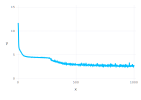

formula_str = "FDEAD ~ RCONSC1 + RCONSC2 + RDELAY + AGE + RATRIAL + RCT + RVISINF + RASP3"
features = ["RATRIAL", "RVISINF", "RCT", "RDELAY", "AGE", "RASP3"]
probabilities_death_region_syn = Union{Missing, Float64}[0.8708247856215909, 0.7274649764760163, 0.7711392572224246, 0.8673494394390194, 0.3634979476375856, 0.8505208947884525, 0.6989843728657114, 0.6011386552194221, 0.7786143257913191, 0.7140180071412013, 0.2041882825469086, 0.3532204426695323, 0.91000248287856, 0.6840690782294108, 0.7546794645813782, 0.1948112366284128, 0.5750517674230688, 0.7412665898535955, 0.7179906748028048, 0.15401846366480648, 0.3829926430761103, 0.4152602657246518, 0.7361975220900231, 0.4998997561653435, 0.6521059427853106, 0.04809637253027271, 0.1562913337249469, 0.8757395095362495, 0.5701618858523145, 0.18854463094995705, 0.16781720616713341, 0.4855349576540632, 0.05484232150349038, 0.7512316579762464, 0.766253540988697, 0.8023403796061798, 0.38044620409390173, 0.03714998188745644, 0.5959410860437727, 0

(multimodal_vae(Dense(12 => 12, tanh), Dense(3 => 3, tanh), Dense(12 => 2), Dense(3 => 2), Dense(12 => 2), Dense(3 => 2), Dense(2 => 22, tanh), Dense(22 => 3), Dense(22 => 3), Dense(22 => 12, σ), Bool[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 3, 12, false, 0.5, TBLogger("/Users/farhadyar/Documents/Project_PTVAE/progs/github_repo/PTVAE/runs/run_404/vae_1"), min_level=Info, purge_step=1000)), DataLoader{Adjoint{Float64, Matrix{Float64}}, Random._GLOBAL_RNG, Val{nothing}}([1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0; … ; 1.0 0.0 … 0.0 0.0; 0.0 0.0 … 1.0 0.0], 128, false, true, true, false, Val{nothing}(), Random._GLOBAL_RNG()), Any[11.680187640288729, 11.010218448483949, 9.954829126139405, 8.567187829222917, 7.389415028689303, 6.808702447066272, 6.612440767058817, 6.451322904498741, 6.349112835907086, 6.271153444085775  …  2.5447181585065963, 2.820550253736385, 2.5637603905309794, 2.544497734729346, 2.5474999878893416, 2.7657096345537013, 2.5712448021982626, 2.6254321437694292, 2.75785182423

In [240]:
# # args.β = 0.5
# args.η = 1e-4
# # args.λ = 1e-2
# args.epochs = 1000
# # args.multimodal_encoder = true
# args.batch_size = 32
# # args.latent_dim = 2
# args.hidden_dim = 28


args.δ = 0.3    
if args.hyperopt_flag
    trainVAE_hyperparams_opt!(preprocessed_data, x, dataTypeArray, preprocess_ps, args)
else
    model, training_data, loss_array_vae = trainVAE!(preprocessed_data, x, dataTypeArray, preprocess_ps, args)
end

# model = load_model("runs/run_299/vae/vae.bson")